<div align="center"><h1>
FYS-STK4155 - Exercises Week 35
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Håvard Skåli
</div>

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Exercise 1:

We know that $\mathbf{a}^\textrm{T}\mathbf{x}$ is a dot product, and that it alternatively can be written as $\mathbf{a}\cdot\mathbf{x}$. We also have the following identity:
$$
\frac{\partial\left(\mathbf{u}^\textrm{T}\mathbf{v}\right)}{\partial\mathbf{w}} 
= \frac{\partial\left(\mathbf{u}\cdot\mathbf{v}\right)}{\partial\mathbf{w}}
= \mathbf{u}\cdot\frac{\partial\mathbf{v}}{\partial\mathbf{w}} + \mathbf{v}\cdot\frac{\partial\mathbf{u}}{\partial\mathbf{w}}
= \mathbf{u}^\textrm{T}\frac{\partial\mathbf{v}}{\partial\mathbf{w}} + \mathbf{v}^\textrm{T}\frac{\partial\mathbf{u}}{\partial\mathbf{w}}.
$$
Furthermore, the derivative of $\mathbf{x}$ with respect to itself is given by
$$
\frac{\partial\mathbf{x}}{\partial\mathbf{x}} 
= \begin{bmatrix} \frac{\partial x_1}{\partial x_1} \:\: \frac{\partial x_1}{\partial x_2} \:\ldots\:\frac{\partial x_1}{\partial x_N} \\
\frac{\partial x_2}{\partial x_1} \:\: \frac{\partial x_2}{\partial x_2} \:\ldots\:\frac{\partial x_2}{\partial x_N} \\
\vdots \hspace{16pt} \vdots \hspace{9pt} \ddots \hspace{9pt} \vdots\\
\frac{\partial x_N}{\partial x_1} \:\: \frac{\partial x_N}{\partial x_2} \:\ldots\:\frac{\partial x_N}{\partial x_N}
\end{bmatrix}
=
\begin{bmatrix} 1 \:\: 0 \:\ldots\:0 \\
0 \:\: 1 \:\ldots\:0 \\
\vdots \hspace{6pt} \vdots \hspace{3pt} \ddots \hspace{3pt} \vdots\\
0 \:\: 0 \:\ldots\:1
\end{bmatrix}
= \mathbf{I}_{N\times N},
$$
while the derivative of $\mathbf{a}$ with respect to $\mathbf{x}$ gives us $\mathbf{0}_{N\times N}$, assuming that none of the elements in $\mathbf{a}$ are dependent on any of the elements in $\mathbf{x}$. Thus, we get
$$
\frac{\partial\left(\mathbf{a}^\textrm{T}\mathbf{x}\right)}{\partial\mathbf{x}}
= \mathbf{a}^\textrm{T}\frac{\partial\mathbf{x}}{\partial\mathbf{x}} + \mathbf{x}^\textrm{T}\frac{\partial\mathbf{a}}{\partial\mathbf{x}}
= \mathbf{a}^\textrm{T}\mathbf{I}_{N\times N} + \mathbf{x}^\textrm{T}\mathbf{0}_{N\times N}
= \mathbf{a}^\textrm{T} + \mathbf{0}^\textrm{T}_{N\times 1} = \mathbf{a}^\textrm{T},
$$
just like we wanted to show.

Using the same identity as in the first line with $\mathbf{a}$ as both $\mathbf{u}$ and $\mathbf{w}$, and $\mathbf{A}\mathbf{a}$ as $\mathbf{v}$, along with the logic presented above we have
$$
\frac{\partial \left(\mathbf{a}^\textrm{T}\mathbf{A}\mathbf{a}\right)}{\partial\mathbf{a}} 
= \mathbf{a}^\textrm{T}\frac{\partial \left(\mathbf{A}\mathbf{a}\right)}{\partial\mathbf{a}} + \left(\mathbf{A}\mathbf{a}\right)^\textrm{T}\frac{\partial \mathbf{a}}{\partial\mathbf{a}}
= \mathbf{a}^\textrm{T}\left(\mathbf{A}\frac{\partial \mathbf{a}}{\partial\mathbf{a}} \right) + \mathbf{a}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{I}_{N\times N}
= \mathbf{a}^\textrm{T}\Big(\mathbf{A}\mathbf{I}_{N\times N} + \mathbf{A}^\textrm{T}\mathbf{I}_{N\times N}\Big)
= \mathbf{a}^\text{T}\left(\mathbf{A} + \mathbf{A}^\textrm{T}\right),
$$
where I have used that 
$$
\frac{\partial \left(\mathbf{A}\mathbf{u}\right)}{\partial\mathbf{v}} = \mathbf{A}\frac{\partial \mathbf{u}}{\partial\mathbf{v}},
$$
as long as $\mathbf{A}$ is not a function of $\mathbf{v}$.


Lastly, we can split the partial derivative in the third expression into four seperate partial derivatives, i.e.
$$
\frac{\partial\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)^\textrm{T}\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)}{\partial\mathbf{s}} 
= \frac{\partial\left(\mathbf{x}^\textrm{T}-\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\right)\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)}{\partial\mathbf{s}}
= \frac{\partial\mathbf{x}^\textrm{T}\mathbf{x}}{\partial\mathbf{s}} 
- \frac{\partial\mathbf{x}^\textrm{T}\mathbf{A}\mathbf{s}}{\partial\mathbf{s}}
- \frac{\partial\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{x}}{\partial\mathbf{s}}
+ \frac{\partial\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{A}\mathbf{s}}{\partial\mathbf{s}}.  
$$
Since $\mathbf{x}^\textrm{T}\mathbf{x}$ is independent of $\mathbf{s}$, the first term is zero. The second and third terms are both equal to $\mathbf{x}^\textrm{T}\mathbf{A}$, since $\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{x}=\mathbf{x}^\textrm{T}\mathbf{A}\mathbf{s}$ is a scalar. Finally, the last term can be rewritten as
$$
\frac{\partial\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{A}\mathbf{s}}{\partial\mathbf{s}}
= \mathbf{A}^\textrm{T}\mathbf{A}\frac{\partial\mathbf{s}^\textrm{T}\mathbf{s}}{\partial\mathbf{s}}
= \mathbf{A}^\textrm{T}\mathbf{A}\frac{\partial\mathbf{s}^2}{\partial\mathbf{s}}
= 2\mathbf{A}^\textrm{T}\mathbf{A}\mathbf{s} = 2\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{A},
$$
hence
$$
\frac{\partial\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)^\textrm{T}\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)}{\partial\mathbf{s}}
= - \mathbf{x}^\textrm{T}\mathbf{A}-\mathbf{x}^\textrm{T}\mathbf{A} + 2\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{A}
= -2\left(\mathbf{x}^\textrm{T} - \mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T} \right)\mathbf{A} = -2\left(\mathbf{x} - \mathbf{A}\mathbf{s} \right)^\textrm{T}\mathbf{A}. 
$$
just like we wanted to show. To find the second derivative with respect to the vector $\mathbf{s}$ we can use that $\mathbf{x}^\textrm{T}\mathbf{A}$ and $\mathbf{A}^\textrm{T}\mathbf{A}$ are both independent of $\mathbf{s}$, hence
$$
\frac{\partial^2\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)^\textrm{T}\left(\mathbf{x}-\mathbf{A}\mathbf{s}\right)}{\partial\mathbf{s}\partial\mathbf{s}^\textrm{T}} = -2\frac{\partial\left(\mathbf{x^\textrm{T} - \mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}} \right)\mathbf{A}}{\partial\mathbf{s}^\textrm{T}} = -2\frac{\partial\left(\mathbf{x}^\textrm{T}\mathbf{A}\right)}{\partial\mathbf{s}^\textrm{T}} + 2\frac{\partial\left(\mathbf{s}^\textrm{T}\mathbf{A}^\textrm{T}\mathbf{A}\right)}{\partial\mathbf{s}^\textrm{T}} = 2\mathbf{A}^\textrm{T}\mathbf{A}.
$$
Since $\mathbf{A}$ acts as the design matrix $\mathbf{X}$ when $\mathbf{x}$ is replaced with the outputs $\mathbf{y}$ and the vector $\mathbf{s}$ with the parameter vector $\boldsymbol{\beta}$, we see that the double derivative of the mean squared error (which is proportional to $\left(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\right)^\textrm{T}\left(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\right)$) indeed is proportional to the Hessian matrix $H = \mathbf{X}^\textrm{T}\mathbf{X}$.

## Exercise 2:

### a)

In [46]:
# Using the shape (100, 1), which were proposed in the task description
x = np.random.rand(100, 1)
y = 2.0 + 5.0 * x**2 + 0.1 * np.random.randn(100, 1)

# Initializing the design matrix
X = np.asmatrix(np.array([np.ones_like(x), x, x**2])).T

def fit(y, X):
    # Function for estimating β and y_tilde
    beta = (X.T * X)**(-1) * X.T * y
    y_tilde = X @ beta
    return np.asarray(y_tilde), np.asarray(beta)

y_tilde, beta = fit(y, X)

# Print results
print("Estimated values:\n", "β_0 =", beta[0, 0], " β_1 =", beta[1, 0], " β_2 =", beta[2, 0], "\nTrue values:\n", "β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0")

Estimated values:
 β_0 = 2.0148866081339447  β_1 = -0.12853114575143865  β_2 = 5.1201636968039566 
True values:
 β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0


In [47]:
# Making x and y 1D because 2D creates issues with LinearRegression
x = np.random.rand(100)
y = 2.0 + 5.0 * x**2 + 0.1 * np.random.randn(100)

# Initializing the design matrix
X = np.array([np.ones_like(x), x, x**2]).T

def fit(y, X):
    # Function for estimating β and y_tilde
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    y_tilde = X @ beta
    return y_tilde, beta

y_tilde, beta = fit(y, X)

# Print results
print("Estimated values with own code:\n", "β_0 =", beta[0], " β_1 =", beta[1], " β_2 =", beta[2], "\nTrue values:\n", "β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0")

Estimated values with own code:
 β_0 = 2.0220072806975637  β_1 = -0.0707182363998089  β_2 = 5.086095110227235 
True values:
 β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0


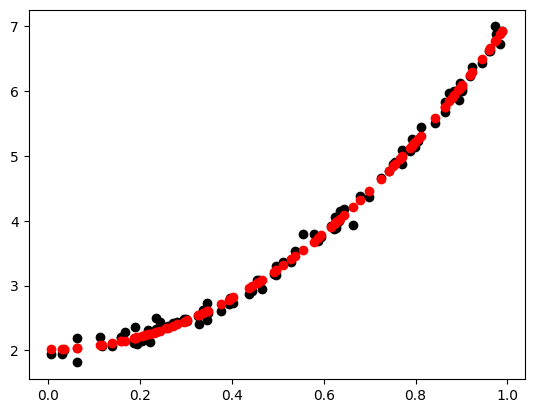

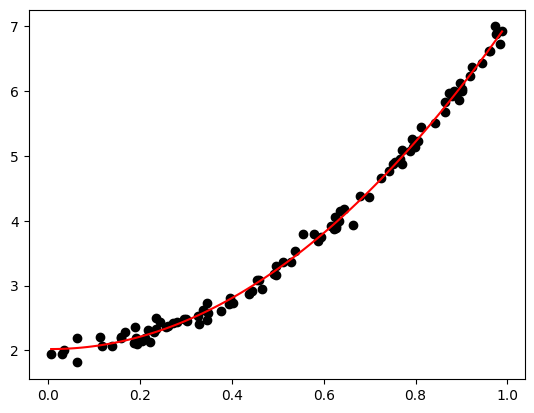

In [48]:
# Plot y_tilde (must use scatter for them to stay along the line)
plt.scatter(x, y, c = "k")
plt.plot(x, y_tilde, "ro")
plt.show()

# Plot y_tilde as line
x_plot = np.linspace(np.min(x), np.max(x), len(x))
y_plot = beta[0] + beta[1] * x_plot + beta[2] * x_plot**2
plt.scatter(x, y, c = "k")
plt.plot(x_plot, y_plot, "r")
plt.show()

In [49]:
def MSE(y, y_tilde):
    # Function for computing mean squared error of fit
    return 1 / len(y) * np.sum((y - y_tilde)**2)

def R2_score(y, y_tilde):
    # Function for computing the score R^2
    return 1 - np.sum((y - y_tilde)**2) / np.sum((y - np.mean(y_tilde))**2)

# Print results
print("Mean squared error:", MSE(y, y_tilde))
print("R^2 score function:", R2_score(y, y_tilde))

Mean squared error: 0.00873517531519543
R^2 score function: 0.9963581421968214


### b)

In [50]:
# Create instance of LinearRegression and estimate fit
lin_model = LinearRegression()
lin_model.fit(X, y)

# Getting the intercept, which is β_0
beta_0 = lin_model.intercept_
# Getting the other coefficients (β_1 and β_2), where the first coefficient is irrelevant
coef_0, beta_1, beta_2 = lin_model.coef_

# Print results and compare with own code
print("Estimated values with own code:\n", "β_0 =", beta[0], " β_1 =", beta[1], " β_2 =", beta[2], \
      "\nEstimated values with scikit-learn:\n", "β_0 =", beta_0, " β_1 =", beta_1, " β_2 =", beta_2, \
      "\nDifferences between own code and scikit-learn:\n", "β_0 =", np.abs(beta_0 - beta[0]), "β_1 =", np.abs(beta_1 - beta[1]), "β_2 =", np.abs(beta_2 - beta[2]), \
      "\nTrue values:\n", "β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0")

Estimated values with own code:
 β_0 = 2.0220072806975637  β_1 = -0.0707182363998089  β_2 = 5.086095110227235 
Estimated values with scikit-learn:
 β_0 = 2.022007280697556  β_1 = -0.07071823639980579  β_2 = 5.086095110227235 
Differences between own code and scikit-learn:
 β_0 = 7.549516567451064e-15 β_1 = 3.1086244689504383e-15 β_2 = 0.0 
True values:
 β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0


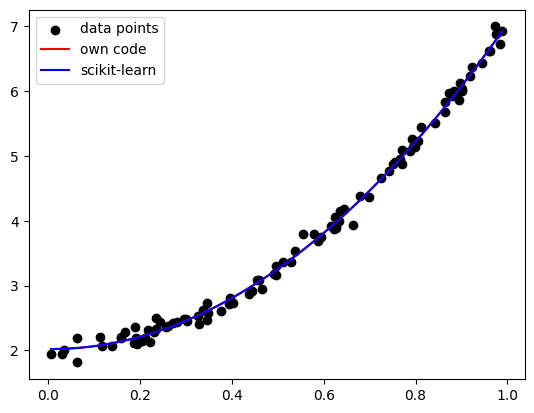

In [51]:
# Plot fits from own code and scikit-learn over data points
y_plot_scikit = beta_0 + beta_1 * x_plot + beta_2 * x_plot**2
plt.scatter(x, y, c = "k", label = "data points")
plt.plot(x_plot, y_plot, "r", label = "own code")
plt.plot(x_plot, y_plot_scikit, "b", label = "scikit-learn")
plt.legend()
plt.show()

### c)

In [52]:
# Get y_tilde with scikit-learn
y_predict = lin_model.predict(X)

# Compute MSE and R^2 with own functions
print("Fit from scikit-learn:")
print("     Mean squared error:", MSE(y, y_predict))
print("     R^2 score function:", R2_score(y, y_predict))

# Compare with fit obtained with own functions
print("Fit from own functions:")
print("     Mean squared error:", MSE(y, y_tilde))
print("     R^2 score function:", R2_score(y, y_tilde))

Fit from scikit-learn:
     Mean squared error: 0.008735175315195421
     R^2 score function: 0.9963581421968214
Fit from own functions:
     Mean squared error: 0.00873517531519543
     R^2 score function: 0.9963581421968214


Estimated values with scikit-learn:
 β_0 = 2.082727782844212  β_1 = 0.16503897326267936  β_2 = 4.756308319377203 
True values:
 β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0
Fit from scikit-learn:
     Mean squared error: 0.2572912428321796
     R^2 score function: 0.8957205359349276


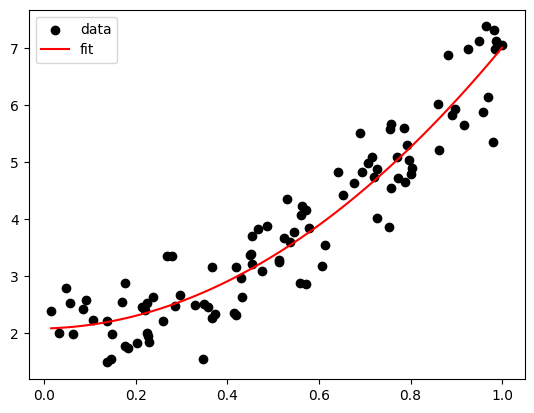

In [53]:
# Increasing the coefficient in front of the added stochastic noise term
x = np.random.rand(100)
y = 2.0 + 5.0 * x**2 + 0.5 * np.random.randn(100)

# Initializing the design matrix
X = np.array([np.ones_like(x), x, x**2]).T

# Create instance of LinearRegression and estimate fit
lin_model = LinearRegression()
lin_model.fit(X, y)

# Getting the intercept, which is β_0
beta_0 = lin_model.intercept_
# Getting the other coefficients (β_1 and β_2), where the first coefficient is irrelevant
coef_0, beta_1, beta_2 = lin_model.coef_

# Print results
print("Estimated values with scikit-learn:\n", "β_0 =", beta_0, " β_1 =", beta_1, " β_2 =", beta_2, "\nTrue values:\n", "β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0")

# Get y_tilde
y_predict = lin_model.predict(X)

# Compute MSE and R^2
print("Fit from scikit-learn:")
print("     Mean squared error:", MSE(y, y_predict))
print("     R^2 score function:", R2_score(y, y_predict))

# Plot fit over data points
x_plot = np.linspace(np.min(x), np.max(x), len(x))
y_plot = beta_0 + beta_1 * x_plot + beta_2 * x_plot**2
plt.scatter(x, y, c = "k", label = "data")
plt.plot(x_plot, y_plot, "r", label = "fit")
plt.legend()
plt.show()

Estimated values with scikit-learn:
 β_0 = 1.4666648357642145  β_1 = 2.092195595812888  β_2 = 3.3834246587942625 
True values:
 β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0
Fit from scikit-learn:
     Mean squared error: 0.9047577003046924
     R^2 score function: 0.7249686149441789


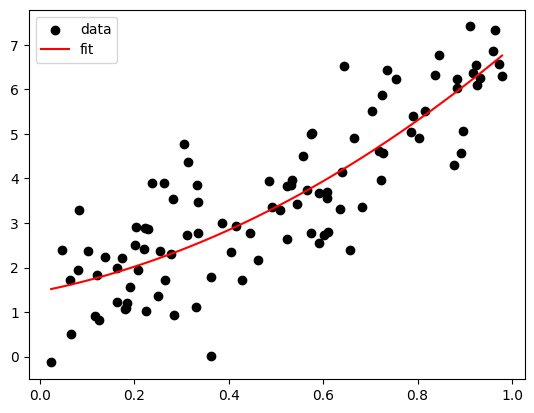

In [54]:
# Increasing the coefficient in front of the added stochastic noise term again
x = np.random.rand(100)
y = 2.0 + 5.0 * x**2 + 1.0 * np.random.randn(100)

# Initializing the design matrix
X = np.array([np.ones_like(x), x, x**2]).T

# Create instance of LinearRegression and estimate fit
lin_model = LinearRegression()
lin_model.fit(X, y)

# Getting the intercept, which is β_0
beta_0 = lin_model.intercept_
# Getting the other coefficients (β_1 and β_2), where the first coefficient is irrelevant
coef_0, beta_1, beta_2 = lin_model.coef_

# Print results
print("Estimated values with scikit-learn:\n", "β_0 =", beta_0, " β_1 =", beta_1, " β_2 =", beta_2, "\nTrue values:\n", "β_0 = 2.0,  β_1 = 0.0,  β_2 = 5.0")

# Get y_tilde
y_predict = lin_model.predict(X)

# Compute MSE and R^2
print("Fit from scikit-learn:")
print("     Mean squared error:", MSE(y, y_predict))
print("     R^2 score function:", R2_score(y, y_predict))

# Plot fit over data points
x_plot = np.linspace(np.min(x), np.max(x), len(x))
y_plot = beta_0 + beta_1 * x_plot + beta_2 * x_plot**2
plt.scatter(x, y, c = "k", label = "data")
plt.plot(x_plot, y_plot, "r", label = "fit")
plt.legend()
plt.show()

### Comment:

Not surprisingly, the fits are worse the more noise is present in the data. This is clearly evident from the plots, but we can also see it based on the mean squared errors and the scores. When the coefficient is 0.1 the MSE is around 0.01, compared to around 1.0 when the coefficient is 1.0. The largest relative increase in MSE seems to occur as we increase the coefficient from 0.1 to 0.5, as the MSE increased from about 0.01 to 0.2-0.3. I am guessing that the closer the score is to 1 the better the fit, which seems to agree with the observed MSE.

## Exercise 3:

### a)

In [13]:
np.random.seed()
n = 100

# Make data set
x = np.linspace(-3, 3, n).reshape(-1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2)+ np.random.normal(0, 0.1, x.shape)

# Initializing the design matrix
X = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5]).T

# Split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### b)

In [14]:
# Using own code first to estimate fit
y_tilde, beta = fit(y_train, X_train)

# Print results
print("Estimated parameters with own code:\n", "  β_0 =", beta[0], "\n   β_1 =", beta[1], "\n   β_2 =", beta[2], "\n   β_3 =", beta[3], "\n   β_4 =", beta[4], "\n   β_5 =", beta[5])

# Using the fit to get y_tilde for the test values
y_predict = X_test @ beta

Estimated parameters with own code:
   β_0 = 0.7895599173674717 
   β_1 = 0.2659564440339835 
   β_2 = -0.015293466958489339 
   β_3 = 0.05520255542657729 
   β_4 = -0.003955503615948653 
   β_5 = -0.008963580823695212


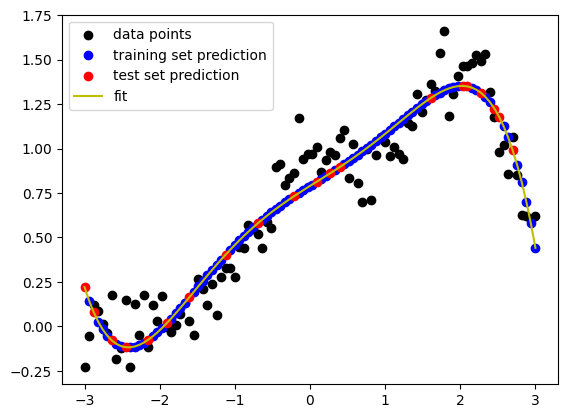

In [15]:
# Plot results
plt.scatter(x, y, c = "k", label = "data points")
plt.scatter(X_train[:, 1], y_tilde, c = "b", label = "training set prediction")
plt.scatter(X_test[:, 1], y_predict, c = "r", label = "test set prediction")
plt.plot(x, X @ beta, "y", label = "fit")
plt.legend()
plt.show()

In [16]:
# Compute MSE and R^2 for the training set
print("Training set:")
print("     MSE:", MSE(y_train, y_tilde))
print("     R^2:", R2_score(y_train, y_tilde))

# Compute MSE and R^2 for the test set
print("Training set:")
print("     MSE:", MSE(y_test, y_predict))
print("     R^2:", R2_score(y_test, y_predict))

Training set:
     MSE: 0.022601455029291624
     R^2: 0.9076664225615374
Training set:
     MSE: 0.028807168010871916
     R^2: 0.9124297318073461


In [17]:
# Create instance of LinearRegression and estimate fit
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Getting the intercept, which is β_0
beta_0 = lin_model.intercept_
# Getting the other coefficients (β_1 to β_5), where the first coefficient is irrelevant (making a copy so that the first coefficient is not overwritten in the next line)
beta = lin_model.coef_.copy()
# Replace first coefficient with intercept
beta[0] = beta_0

# Print results
print("Estimated parameters with scikit-learn:\n", "  β_0 =", beta[0], "\n   β_1 =", beta[1], "\n   β_2 =", beta[2], "\n   β_3 =", beta[3], "\n   β_4 =", beta[4], "\n   β_5 =", beta[5])

# Make the training set (y_tilde) and test set (y_predict) predictions
y_tilde = lin_model.predict(X_train)
y_predict = lin_model.predict(X_test)

Estimated parameters with scikit-learn:
   β_0 = 0.7895599173674726 
   β_1 = 0.26595644403398394 
   β_2 = -0.015293466958491049 
   β_3 = 0.05520255542657757 
   β_4 = -0.003955503615948486 
   β_5 = -0.008963580823695215


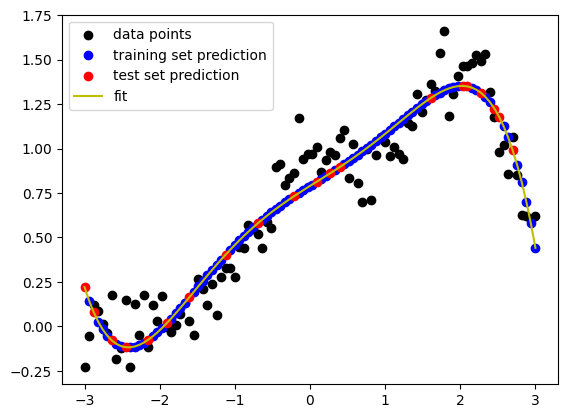

In [18]:
# Plot results
plt.scatter(x, y, c = "k", label = "data points")
plt.scatter(X_train[:, 1], y_tilde, c = "b", label = "training set prediction")
plt.scatter(X_test[:, 1], y_predict, c = "r", label = "test set prediction")
plt.plot(x, X @ beta, "y", label = "fit")
plt.legend()
plt.show()

In [19]:
# Compute MSE and R^2 for the training set
print("Training set:")
print("     MSE:", MSE(y_train, y_tilde))
print("     R^2:", R2_score(y_train, y_tilde))

# Compute MSE and R^2 for the test set
print("Test set:")
print("     MSE:", MSE(y_test, y_predict))
print("     R^2:", R2_score(y_test, y_predict))

Training set:
     MSE: 0.02260145502929163
     R^2: 0.9076664225615374
Test set:
     MSE: 0.02880716801087184
     R^2: 0.9124297318073463


### Comment:

Results from own code seem to agree very well with those from scikit-learn, which is a good sign. Moreover, a five degree polynomial seems to not be the best fit to the data, but maybe a fifteen degree polynomial will fit better?

### c)

In [20]:
# Initializing the design matrix
X = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**14, x**15]).T

# Split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create instance of LinearRegression and estimate fit
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Getting the intercept, which is β_0
beta_0 = lin_model.intercept_
# Getting the other coefficients, where the first coefficient is irrelevant (making a copy so that the first coefficient is not overwritten in the next line)
beta = lin_model.coef_.copy()
# Replace first coefficient with intercept
beta[0] = beta_0

# Make the training set (y_tilde) and test set (y_predict) predictions
y_tilde = lin_model.predict(X_train)
y_predict = lin_model.predict(X_test)

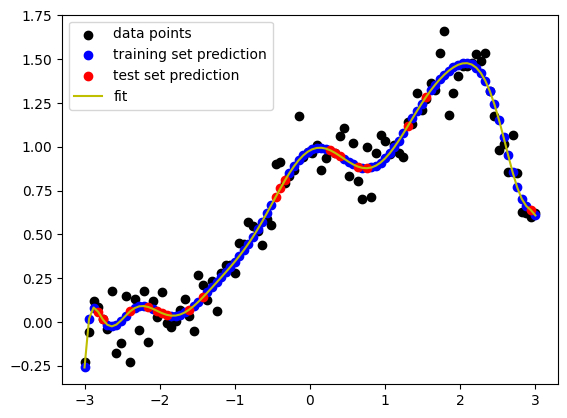

In [21]:
# Plot results
plt.scatter(x, y, c = "k", label = "data points")
plt.scatter(X_train[:, 1], y_tilde, c = "b", label = "training set prediction")
plt.scatter(X_test[:, 1], y_predict, c = "r", label = "test set prediction")
plt.plot(x, X @ beta, "y", label = "fit")
plt.legend()
plt.show()

In [22]:
# Compute MSE and R^2 for the training set
print("Training set:")
print("     MSE:", MSE(y_train, y_tilde))
print("     R^2:", R2_score(y_train, y_tilde))

# Compute MSE and R^2 for the test set
print("Test set:")
print("     MSE:", MSE(y_test, y_predict))
print("     R^2:", R2_score(y_test, y_predict))

Training set:
     MSE: 0.01091318977258782
     R^2: 0.9581051881312797
Test set:
     MSE: 0.011981643629153074
     R^2: 0.9492387451720603


### Comment:

This fit looks significantly better, as expected.

In [40]:
MSE_train = np.zeros(14); R2_train = np.zeros(14); MSE_test = np.zeros(14); R2_test = np.zeros(14) 
X_list = []; beta_list = []

# Starting with second degree polynomials, going all the way up to fifteen degree polynomials
for i in range(3, 17):
    # Store the design matrix
    X_list.append(X[:, :i])

    # Split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X[:, :i], y, test_size = 0.2)

    # Create instance of LinearRegression and estimate fit
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)

    # Getting the intercept, which is β_0
    beta_0 = lin_model.intercept_.copy()
    # Getting the other coefficients (β_1 to β_{i-1}), where the first coefficient is irrelevant (making a copy so that the first coefficient is not overwritten in the next line)
    beta = lin_model.coef_.copy()
    # Replace first coefficient with intercept
    beta[0] = beta_0

    # Store the coefficients
    beta_list.append(beta.copy())

    # Make the training set (y_tilde) and test set (y_predict) predictions
    y_tilde = lin_model.predict(X_train)
    y_predict = lin_model.predict(X_test)

    # Compute MSE and R^2 for the training set
    MSE_train[i-3] = MSE(y_train, y_tilde)
    R2_train[i-3] = R2_score(y_train, y_tilde)

    # Compute MSE and R^2 for the test set
    MSE_test[i-3] = MSE(y_test, y_predict)
    R2_test[i-3] = R2_score(y_test, y_predict)
    

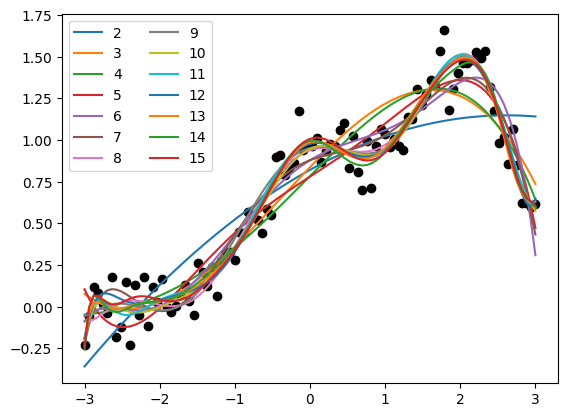

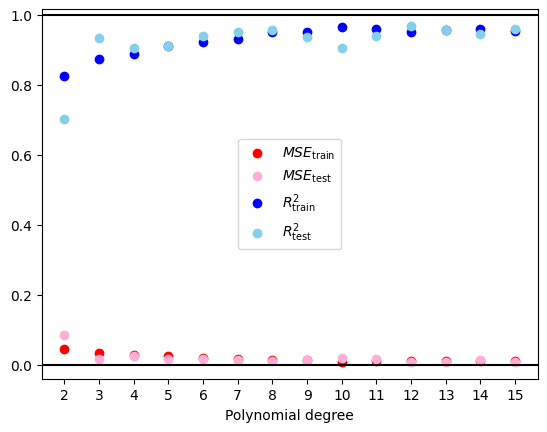

In [41]:
# Plot results
plt.scatter(x, y, c = "k")
for X_, beta_, degree in zip(X_list, beta_list, list(range(2, 16))):
    plt.plot(x, X_ @ beta_, label = f"{degree}")
plt.legend(ncol = 2)
plt.show()

plt.scatter(list(range(2, 16)), MSE_train, c = "r", label = r"$MSE_{\text{train}}$")
plt.scatter(list(range(2, 16)), MSE_test, c = "#ffaed7", label = r"$MSE_{\text{test}}$")
plt.scatter(list(range(2, 16)), R2_train, c = "b", label = r"$R^2_{\text{train}}$")
plt.scatter(list(range(2, 16)), R2_test, c = "skyblue", label = r"$R^2_{\text{test}}$")
plt.axhline(1.0, c = "k")
plt.axhline(0.0, c = "k")
plt.legend(loc = "center")
plt.xticks(list(range(2, 16)))
plt.xlabel("Polynomial degree")
plt.show()

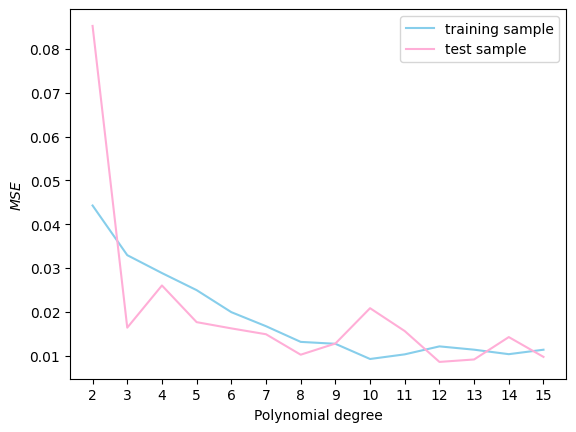

In [42]:
# Attempting to recreate figure 2.11 in Hastie et al.
plt.plot(list(range(2, 16)), MSE_train, c = "skyblue", label = r"training sample")
plt.plot(list(range(2, 16)), MSE_test, c = "#ffaed7", label = r"test sample")
plt.legend()
plt.xticks(list(range(2, 16)))
plt.xlabel("Polynomial degree")
plt.ylabel(r"$MSE$")
plt.show()

### Comment:

My results are somewhat similar to figure 2.11 in that the MSE generally decreases with increasing complexity (especially for the training sample), the shape of the training sample curve, and the fact that the test sample MSE is larger than the training sample MSE at higher complexity. However, the test MSE is actually smaller than the training MSE for the few lowest complexities, contrary to the trends seen in figure 2.11. Moreover, the test MSE fluctuates significantly more than the training MSE, so I think the trends seen in my figure must be interpreted with a grain of salt.

Regarding the polynomial degree where we see the smallest MSE, the training sample seems to have its lowest value at 12, and the test sample at 8. However, since there are so few points and large fluctuations in the test MSE I think polynomial degrees between 11 and 15 seem like the best fits. 

In [43]:
# Attempting to increase the number of data points to 10000 and the maximum polynomial degree to 50
np.random.seed()
n = 10000

# Make data set
x = np.linspace(-3, 3, n).reshape(-1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2)+ np.random.normal(0, 0.1, x.shape)

# Initializing the design matrix
X = np.transpose(np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**14, x**15, x**16, x**17, x**18, x**19, x**20, x**21, x**22, x**24, x**25, x**26, x**27, x**28, x**29, x**30, x**31, x**32, x**33, x**34, x**35, x**36, x**37, x**38, x**39, x**40, x**41, x**42, x**43, x**44, x**45, x**46, x**47, x**48, x**49, x**50]))

In [44]:
MSE_train = np.zeros(49); MSE_test = np.zeros(49)
X_list = []; beta_list = []

# Starting with second degree polynomials, going all the way up to fifteen degree polynomials
for i in range(3, 52):
    # Store the design matrix
    X_list.append(X[:, :i])

    # Split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X[:, :i], y, test_size = 0.2)

    # Create instance of LinearRegression and estimate fit
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)

    # Getting the intercept, which is β_0
    beta_0 = lin_model.intercept_.copy()
    # Getting the other coefficients (β_1 to β_{i-1}), where the first coefficient is irrelevant (making a copy so that the first coefficient is not overwritten in the next line)
    beta = lin_model.coef_.copy()
    # Replace first coefficient with intercept
    beta[0] = beta_0

    # Store the coefficients
    beta_list.append(beta.copy())

    # Make the training set (y_tilde) and test set (y_predict) predictions
    y_tilde = lin_model.predict(X_train)
    y_predict = lin_model.predict(X_test)

    # Compute the MSE for the two sets
    MSE_train[i-3] = MSE(y_train, y_tilde)
    MSE_test[i-3] = MSE(y_test, y_predict)

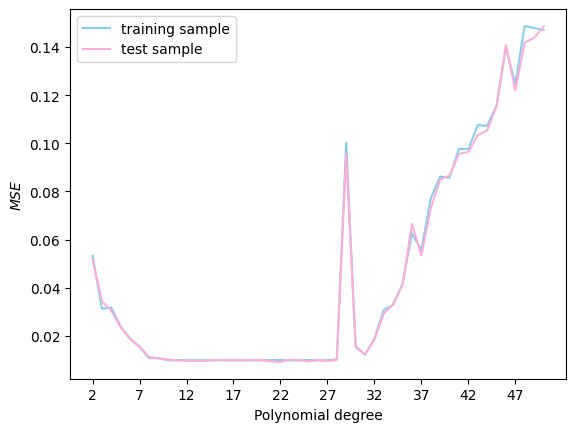

In [45]:
# Attempting to recreate figure 2.11 in Hastie et al.
plt.plot(list(range(2, 51)), MSE_train, c = "skyblue", label = r"training sample")
plt.plot(list(range(2, 51)), MSE_test, c = "#ffaed7", label = r"test sample")
plt.legend()
plt.xticks(list(range(2, 51, 5)))
plt.xlabel("Polynomial degree")
plt.ylabel(r"$MSE$")
plt.show()

### Comment:

Indeed the MSE increases for larger complexity, but this seems to be the case for both the training sample MSE and the test sample MSE. They generally seem to follow the same trend, contrary to figure 2.11, which I am not sure as to why.